In [141]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


In [142]:
df =  pd.read_csv("/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv")
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [143]:
df.shape

(500, 9)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [145]:
df.duplicated().sum()

0

In [146]:
df.drop(columns=['Serial No.'],inplace=True)

In [147]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [148]:
X=df.iloc[:,0:-1]
Y = df.iloc[:,-1]

In [149]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [150]:
Y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

In [151]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test =train_test_split(X,Y,test_size = 0.2,random_state=43)
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
12,328,112,4,4.0,4.5,9.10,1
199,313,107,3,4.0,4.5,8.69,0
488,322,112,3,3.0,4.0,8.62,1
231,319,106,3,3.5,2.5,8.33,1
3,322,110,3,3.5,2.5,8.67,1
...,...,...,...,...,...,...,...
277,320,101,2,2.5,3.0,8.62,0
305,321,109,3,3.5,3.5,8.80,1
255,307,110,4,4.0,4.5,8.37,0
320,317,106,3,4.0,3.5,8.50,1


In [152]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)


In [153]:
X_test_scaled = scaler.transform(X_test)

In [154]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [155]:
model = Sequential()

model.add(Dense(7,activation='relu',input_dim=7))
model.add(Dense(7,activation='relu'))
model.add(Dense(7,activation='relu'))
model.add(Dense(1,activation='relu'))

In [156]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 7)                 56        
_________________________________________________________________
dense_20 (Dense)             (None, 7)                 56        
_________________________________________________________________
dense_21 (Dense)             (None, 7)                 56        
_________________________________________________________________
dense_22 (Dense)             (None, 1)                 8         
Total params: 176
Trainable params: 176
Non-trainable params: 0
_________________________________________________________________


In [157]:
model.compile(loss='mean_squared_error',optimizer='Adam')

In [158]:
history = model.fit(X_train_scaled,Y_train,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 1s 19ms/step - loss: 0.5176 - val_loss: 0.4664
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 0.4852 - val_loss: 0.4341
Epoch 3/100
10/10 [==============================] - 0s 5ms/step - loss: 0.4515 - val_loss: 0.4006
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 0.4142 - val_loss: 0.3645
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 0.3742 - val_loss: 0.3243
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.3287 - val_loss: 0.2790
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2778 - val_loss: 0.2284
Epoch 8/100
10/10 [==============================] - 0s 5ms/step - loss: 0.2220 - val_loss: 0.1765
Epoch 9/100
10/10 [==============================] - 0s 5ms/step - loss: 0.1663 - val_loss: 0.1271
Epoch 10/100
10/10 [==============================] - 0s 5ms/step - loss: 0.1156 - val_loss: 0.0843
Epoch 11

In [159]:
y_pred = model.predict(X_test_scaled)

In [160]:
from sklearn.metrics import r2_score
r2_score(Y_test,y_pred)

0.7814709286235492

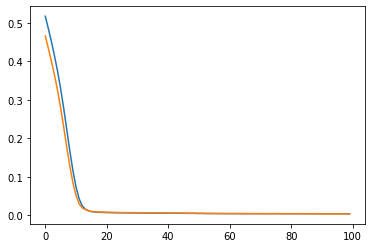

In [161]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])